In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import sys, os
sys.path.append('../../src/')
# import toolbox
from toolbox import *

result_names = ['BBT_Tiingo',                #0
                'BBT_future_Tiingo_ada', 
                'BBT_future_Tiingo_eth',     #2
                'BBT_future_Tiingo_ltc',
                'BBT_future_Tiingo_xrp',     #4
                'BBT_future_BITX',
                'BBT_future_BITW20',         #6
                'BBT_future_BITW70', 
                'BBT_future_BITW100',        #8
                'BBT_future_CRIX']

risk_measures = ['Variance',
                 'ES q=0.05', 'ES q=0.01',
                 'VaR q=0.05', 'VaR q=0.01', 
                 'ERM k=10', 'CH']

order = ['BBT_Tiingo',    
         'BBT_future_CRIX',  'BBT_future_BITX', 'BBT_future_BITW100', 
         'BBT_future_BITW20',  'BBT_future_BITW70',
         'BBT_future_Tiingo_ada', 'BBT_future_Tiingo_eth',  'BBT_future_Tiingo_ltc','BBT_future_Tiingo_xrp']

coin_names = ['btc', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ada', 'eth', 'ltc', 'xrp']

In [37]:
# Stationary Block Bootstrap 2.7.2 of Lahiri

def SB(X, p, N):
    # X: time series to be sampled
    # p: param of Geometric distribution; 1/p = mean of block sample length
    # N: number of SB samples
     
    I = np.random.choice(len(X), N, replace=True)
    L = np.random.geometric(p=p, size=N)
    L[L<=20] = 20
    
    X_repeat = np.repeat(X, np.floor(np.max(L)/len(X))+1, axis=0)
#     print(np.mean(L))
    samples = []
    for i in range(len(I)):
        s = X_repeat[I[i]: I[i]+L[i]]
        samples.append(s)
    
    return samples

In [38]:
# def plot_compare_assets_across_risk_measures(risk_fn):
#     factor = 4
#     xsize = len(risk_measures)*factor
#     ysize = 1*factor

#     fig, axs = plt.subplots(1,len(risk_measures), figsize=(xsize, ysize), sharey=True)

#     for p, rm in enumerate(risk_measures):
#         HE_outer = []
#         for q, rn in enumerate(order):
#             if rm != 'CH':
#                 path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
#                 %(rn, rm)
#             else:
#                 path = '../../results/%s/MM/rh_cross_hedge.csv'\
#                 %(rn)    
#             _df = pd.read_csv(path)

#             B_rs = make_blocks(_df.rs, 1, 100)
#             B_rh = make_blocks(_df.rh, 1, 100)
#             _id = np.random.choice(range(len(B_rs)), 500 , replace=True)

#             HE = []
#             for i in _id:
#                 rho_rs = risk_fn(B_rs[i])
#                 rho_rh = risk_fn(B_rh[i])
#                 HE.append(1-rho_rh/rho_rs)
#             HE_outer.append(HE)

#         axs[p].boxplot(HE_outer)
#         axs[p].set_title(rm)

#     plt.tight_layout()
#     for p, a in enumerate(axs):
#         xtickNames = plt.setp(axs[p], xticklabels=coin_names)
#         plt.setp(xtickNames, rotation=90, fontsize=8)


In [39]:
def plot_compare_assets_across_risk_measures(risk_fn, SB_p, SB_N):
    factor = 4
    xsize = len(risk_measures)*factor
    ysize = 1*factor

    fig, axs = plt.subplots(1,len(risk_measures), figsize=(xsize, ysize), sharey=True)

    HE_outer2 = []
    for p, rm in enumerate(risk_measures):
        HE_outer = []
        for q, rn in enumerate(order):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            samples = SB(np.array(_df.loc[:,['rh', 'rs']]), SB_p, SB_N)

            HE = []
            for s in samples:
                risk_rh = risk_fn(s[:,0])
                risk_rs = risk_fn(s[:,1])
                HE.append(1-risk_rh/risk_rs)
                
            HE_outer.append(HE)
        HE_outer2.append(HE_outer)

        axs[p].boxplot(HE_outer, showfliers=False)
        axs[p].set_title(rm)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=coin_names)
        plt.setp(xtickNames, rotation=90, fontsize=8)


In [40]:
def plot_compare_risk_measures_across_assets(risk_fn, SB_p, SB_N):
    factor = 4
    xsize = len(order)*factor
    ysize = 1*factor

    fig, axs = plt.subplots(1,len(order), figsize=(xsize, ysize), sharey=False)

    
    HE_outer2 = []
    for p, rn in enumerate(order):
        HE_outer = []
        for q, rm in enumerate(risk_measures):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            samples = SB(np.array(_df.loc[:,['rh', 'rs']]), SB_p, SB_N)

            HE = []
            for s in samples:
                risk_rh = risk_fn(s[:,0])
                risk_rs = risk_fn(s[:,1])
                HE.append(1-risk_rh/risk_rs)
                
            HE_outer.append(HE)
        HE_outer2.append(HE_outer)

        axs[p].boxplot(HE_outer, showfliers=False)
        axs[p].set_title(rn)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=risk_measures)
        plt.setp(xtickNames, rotation=90, fontsize=8)
    
    return HE_outer2

\begin{tabular}{lllllll}
\toprule
{} &              Var &              ES5 &               ES1 &             VaR5 &             VaR1 &              ERM \\
\midrule
BTC     &            99.31 &            99.25 &             99.27 &            99.25 &            99.28 &            99.30 \\
        &   (98.40, 99.86) &   (98.34, 99.82) &    (98.12, 99.86) &   (98.46, 99.78) &   (98.28, 99.86) &   (98.23, 99.86) \\
CRIX    &            95.02 &            95.04 &             95.22 &            95.04 &            95.07 &            95.01 \\
        &   (85.98, 98.52) &   (87.00, 98.86) &    (83.30, 97.91) &   (86.04, 98.67) &   (85.40, 98.62) &   (84.14, 98.70) \\
BITX    &            94.84 &            94.70 &             94.67 &            94.77 &            94.77 &            94.80 \\
        &   (84.37, 98.28) &   (73.72, 98.14) &    (82.33, 97.78) &   (83.14, 97.77) &   (77.69, 97.98) &   (78.11, 98.48) \\
BITW100 &            92.07 &            92.60 &             92.93 &            9

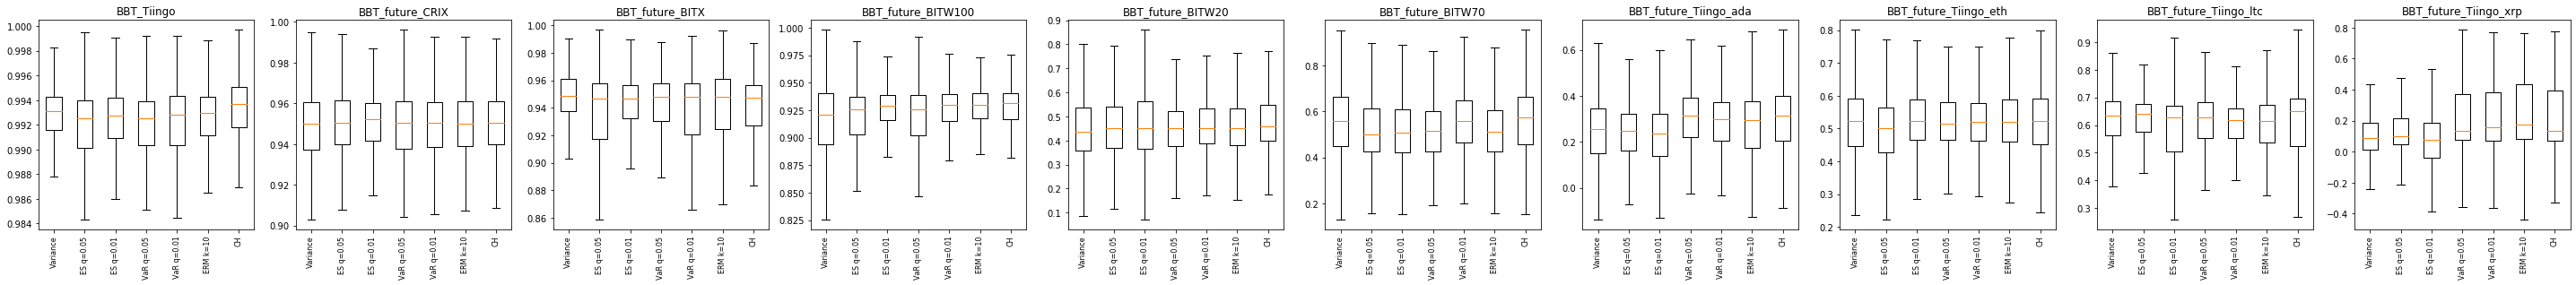

In [6]:
risk_fn = np.var
HE = plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)
DF = pd.DataFrame(HE)

mDF = pd.DataFrame(np.zeros(DF.shape))
q1DF = pd.DataFrame(np.zeros(DF.shape))
q3DF = pd.DataFrame(np.zeros(DF.shape))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        mDF.iloc[i,j]=np.median(DF.iloc[i,j])
        q1DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.025)
        q3DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.975)

mDF.columns = risk_measures
mDF.index = coin_names 

q1DF.columns  = risk_measures
q1DF.index  = coin_names

q3DF.columns  = risk_measures
q3DF.index  = coin_names

ResultDF = pd.DataFrame(np.zeros((DF.shape[0]*2, DF.shape[1])))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        m  = mDF.iloc[i, j] *100
        q1 = q1DF.iloc[i, j] *100
        q3 = q3DF.iloc[i, j] *100
        ResultDF.iloc[2*i, j] = '%.2f'%m
        ResultDF.iloc[2*i+1, j] = '(%.2f, %.2f)'%(q1, q3)

ResultDF.columns = ['Var', 'ES5', 'ES1', 'VaR5', 'VaR1', 'ERM', 'CH']

new_coin_names = ['BTC', '', 'CRIX', '', 'BITX','', 'BITW100', '','BITW20','', 'BITW70','',
                  'ADA','', 'ETH','', 'LTC','', 'XRP', '',]

ResultDF.index = new_coin_names
ResultDF = ResultDF.iloc[:, :-1]
print(ResultDF.to_latex())
# varResultDF.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &               Var &               ES5 &               ES1 &             VaR5 &              VaR1 &               ERM \\
\midrule
BTC     &             89.42 &             89.46 &             89.32 &            89.37 &             89.44 &             89.42 \\
        &    (78.22, 96.61) &    (65.93, 97.30) &    (75.00, 96.44) &   (78.47, 96.98) &    (76.02, 96.14) &    (72.68, 97.00) \\
CRIX    &             84.22 &             84.04 &             83.54 &            83.86 &             83.75 &             83.32 \\
        &    (51.47, 96.51) &    (28.61, 96.09) &    (21.62, 97.24) &   (17.48, 96.23) &    (17.68, 97.11) &    (30.31, 96.67) \\
BITX    &             78.86 &             79.36 &             79.06 &            79.80 &             79.66 &             78.98 \\
        &    (11.25, 90.49) &    (39.64, 95.93) &     (7.56, 95.92) &   (15.20, 94.36) &    (13.22, 96.41) &    (13.60, 93.75) \\
BITW100 &             76.78 &             77.61 &   

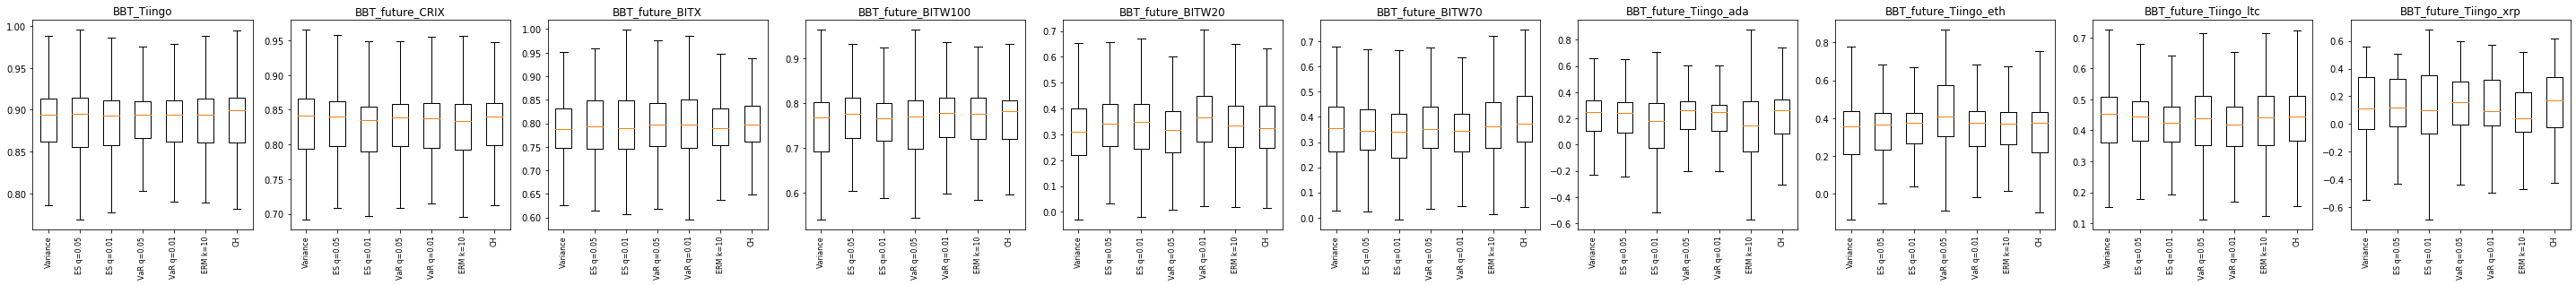

In [7]:
risk_fn = lambda x: ES(0.05, x)
HE = plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)
DF = pd.DataFrame(HE)

mDF = pd.DataFrame(np.zeros(DF.shape))
q1DF = pd.DataFrame(np.zeros(DF.shape))
q3DF = pd.DataFrame(np.zeros(DF.shape))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        mDF.iloc[i,j]=np.median(DF.iloc[i,j])
        q1DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.025)
        q3DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.975)

mDF.columns = risk_measures
mDF.index = coin_names 

q1DF.columns  = risk_measures
q1DF.index  = coin_names

q3DF.columns  = risk_measures
q3DF.index  = coin_names

ResultDF = pd.DataFrame(np.zeros((DF.shape[0]*2, DF.shape[1])))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        m  = mDF.iloc[i, j] *100
        q1 = q1DF.iloc[i, j] *100
        q3 = q3DF.iloc[i, j] *100
        ResultDF.iloc[2*i, j] = '%.2f'%m
        ResultDF.iloc[2*i+1, j] = '(%.2f, %.2f)'%(q1, q3)

ResultDF.columns = ['Var', 'ES5', 'ES1', 'VaR5', 'VaR1', 'ERM', 'CH']

new_coin_names = ['BTC', '', 'CRIX', '', 'BITX','', 'BITW100', '','BITW20','', 'BITW70','',
                  'ADA','', 'ETH','', 'LTC','', 'XRP', '',]

ResultDF.index = new_coin_names
ResultDF = ResultDF.iloc[:, :-1]
print(ResultDF.to_latex())
# varResultDF.to_latex()

\begin{tabular}{lllllll}
\toprule
{} &                Var &               ES5 &               ES1 &              VaR5 &              VaR1 &               ERM \\
\midrule
BTC     &              90.24 &             90.50 &             90.33 &             90.40 &             90.24 &             90.49 \\
        &     (79.75, 98.02) &    (79.14, 98.27) &    (77.32, 96.07) &    (77.51, 98.86) &    (80.55, 97.96) &    (80.41, 97.46) \\
CRIX    &              81.38 &             82.21 &             81.33 &             81.19 &             82.20 &             81.97 \\
        &     (15.20, 96.12) &    (14.80, 98.78) &     (1.73, 94.98) &    (-9.99, 95.38) &    (18.71, 98.86) &    (10.58, 99.41) \\
BITX    &              78.56 &             78.47 &             78.08 &             78.96 &             78.59 &             78.66 \\
        &     (-1.18, 95.99) &    (12.71, 97.74) &   (-14.75, 96.89) &    (13.98, 99.11) &     (4.14, 97.22) &    (-2.12, 98.32) \\
BITW100 &              75.09 &        

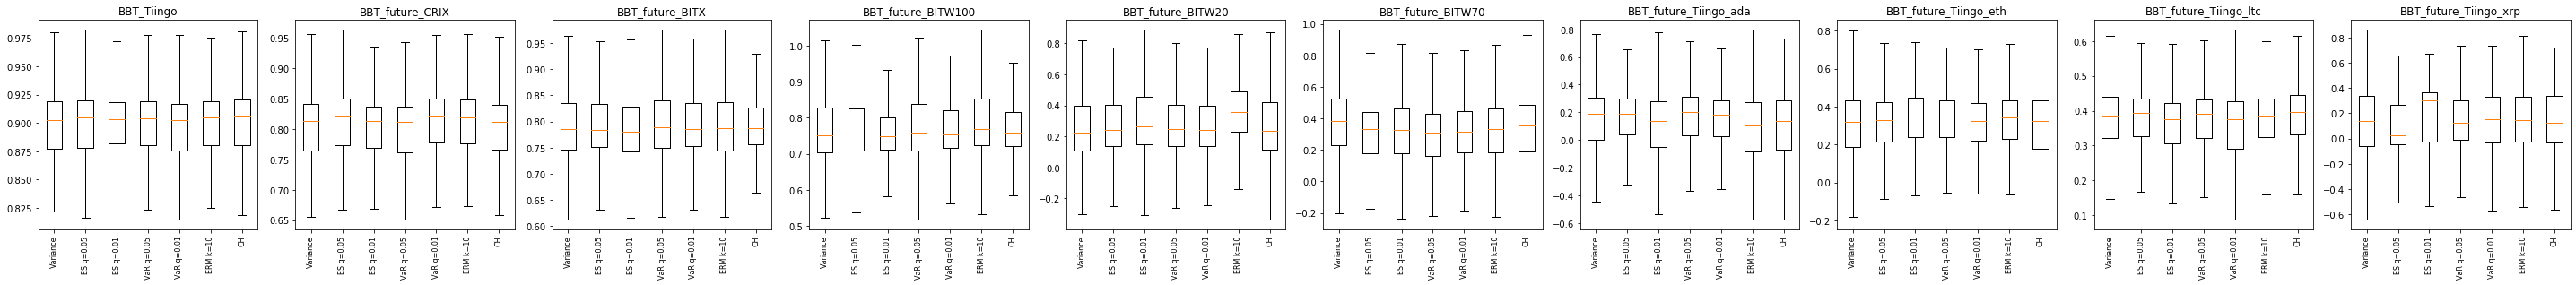

In [8]:
risk_fn = lambda x: ERM_estimate_trapezoidal(10, x)
HE = plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)
DF = pd.DataFrame(HE)

mDF = pd.DataFrame(np.zeros(DF.shape))
q1DF = pd.DataFrame(np.zeros(DF.shape))
q3DF = pd.DataFrame(np.zeros(DF.shape))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        mDF.iloc[i,j]=np.median(DF.iloc[i,j])
        q1DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.025)
        q3DF.iloc[i,j]=np.quantile(DF.iloc[i,j], 0.975)

mDF.columns = risk_measures
mDF.index = coin_names 

q1DF.columns  = risk_measures
q1DF.index  = coin_names

q3DF.columns  = risk_measures
q3DF.index  = coin_names

ResultDF = pd.DataFrame(np.zeros((DF.shape[0]*2, DF.shape[1])))

for i in range(DF.shape[0]):
    for j in range(DF.shape[1]):
        m  = mDF.iloc[i, j] *100
        q1 = q1DF.iloc[i, j] *100
        q3 = q3DF.iloc[i, j] *100
        ResultDF.iloc[2*i, j] = '%.2f'%m
        ResultDF.iloc[2*i+1, j] = '(%.2f, %.2f)'%(q1, q3)

ResultDF.columns = ['Var', 'ES5', 'ES1', 'VaR5', 'VaR1', 'ERM', 'CH']

new_coin_names = ['BTC', '', 'CRIX', '', 'BITX','', 'BITW100', '','BITW20','', 'BITW70','',
                  'ADA','', 'ETH','', 'LTC','', 'XRP', '',]

ResultDF.index = new_coin_names
ResultDF = ResultDF.iloc[:, :-1]
print(ResultDF.to_latex())
# varResultDF.to_latex()

In [9]:
def plot_compare_assets_across_risk_measures_2(risk_fn, SB_p, SB_N, savepath):
    factor = 4.5
    xsize = 3*factor
    ysize = 2*factor

    fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

    HE_outer2 = []
    for p, rm in enumerate(risk_measures[:-1]):
        HE_outer = []
        for q, rn in enumerate(order):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            samples = SB(np.array(_df.loc[:,['rh', 'rs']]), SB_p, SB_N)

            HE = []
            for s in samples:
                risk_rh = risk_fn(s[:,0])
                risk_rs = risk_fn(s[:,1])
                HE.append(1-risk_rh/risk_rs)
                
            HE_outer.append(HE)
        HE_outer2.append(HE_outer)

        if p<=2:
            axs[0, p].boxplot(HE_outer, showfliers=False)
            axs[0, p].set_title(rm)
            
        else:
            axs[1, p-3].boxplot(HE_outer, showfliers=False)
            axs[1, p-3].set_title(rm, fontsize=12)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=coin_names)
        plt.setp(xtickNames, rotation=90, fontsize=12)
    
    plt.subplots_adjust(bottom=0.15)
    plt.savefig(savepath, transparent=True)

In [41]:
def plot_compare_risk_measures_across_assets(risk_fn, SB_p, SB_N, savepath):
    factor = 4
    xsize = 3*factor
    ysize = 2*factor

    fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

    
    HE_outer2 = []
    for p, rn in enumerate(order):
        HE_outer = []
        for q, rm in enumerate(risk_measures):
            if rm != 'CH':
                path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                %(rn, rm)
            else:
                path = '../../results/%s/MM/rh_cross_hedge.csv'\
                %(rn)    
            _df = pd.read_csv(path)

            samples = SB(np.array(_df.loc[:,['rh', 'rs']]), SB_p, SB_N)

            HE = []
            for s in samples:
                risk_rh = risk_fn(s[:,0])
                risk_rs = risk_fn(s[:,1])
                HE.append(1-risk_rh/risk_rs)
                
            HE_outer.append(HE)
        HE_outer2.append(HE_outer)

        if p<=2:
            axs[0, p].boxplot(HE_outer, showfliers=False)
            axs[0, p].set_title(rm)
            
        else:
            axs[1, p-3].boxplot(HE_outer, showfliers=False)
            axs[1, p-3].set_title(rm)

    plt.tight_layout()
    for p, a in enumerate(axs):
        xtickNames = plt.setp(axs[p], xticklabels=risk_measures)
        plt.setp(xtickNames, rotation=90, fontsize=8)
    
    plt.savefig(savepath, transparent=True)
    return HE_outer2

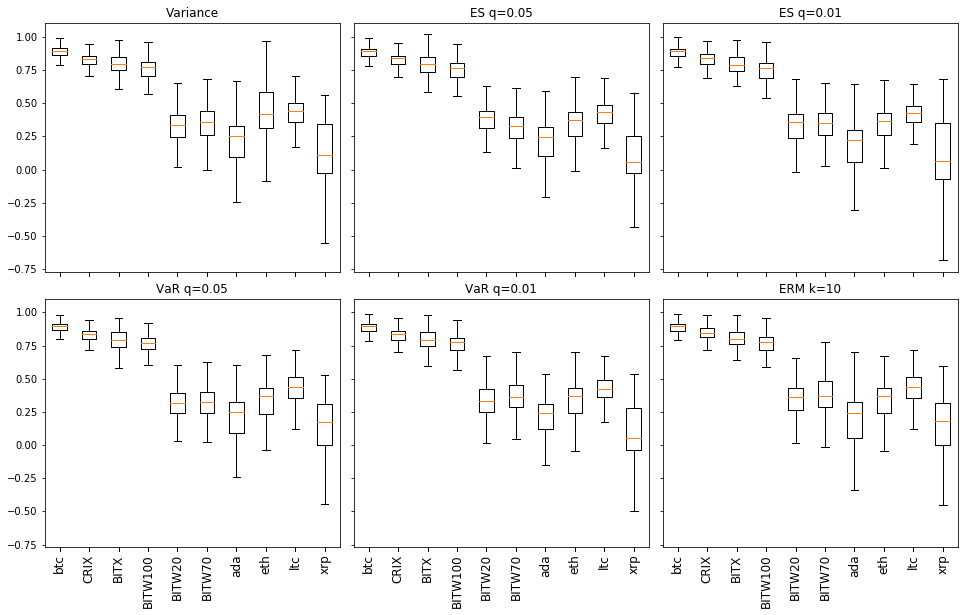

In [11]:
risk_fn = lambda x: ES(0.05, x)
plot_compare_assets_across_risk_measures_2(risk_fn, 1/200, 1000, '../../latex/_pics/ES5_HE_boxplot.pdf')
# plot_compare_assets_across_risk_measures_2(risk_fn, 1/200, 1000, 'ERM_HE_boxplot.png')


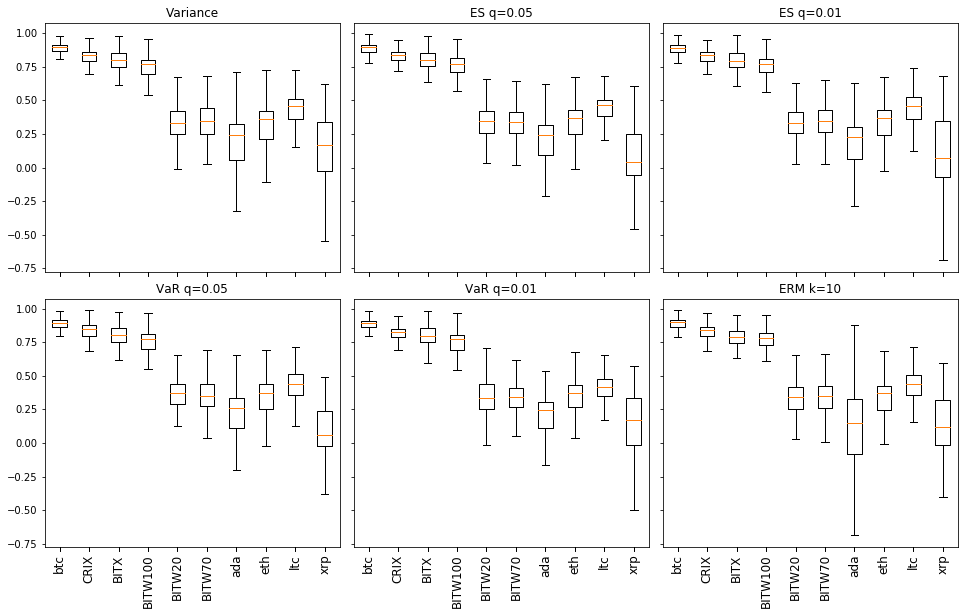

In [12]:
risk_fn = lambda x: ES(0.05, x)
# plot_compare_assets_across_risk_measures_2(risk_fn, 1/200, 1000, 'ES5_HE_boxplot.png')
plot_compare_assets_across_risk_measures_2(risk_fn, 1/200, 1000, 'ERM_HE_boxplot.png')


TypeError: plot_compare_risk_measures_across_assets() missing 1 required positional argument: 'savepath'

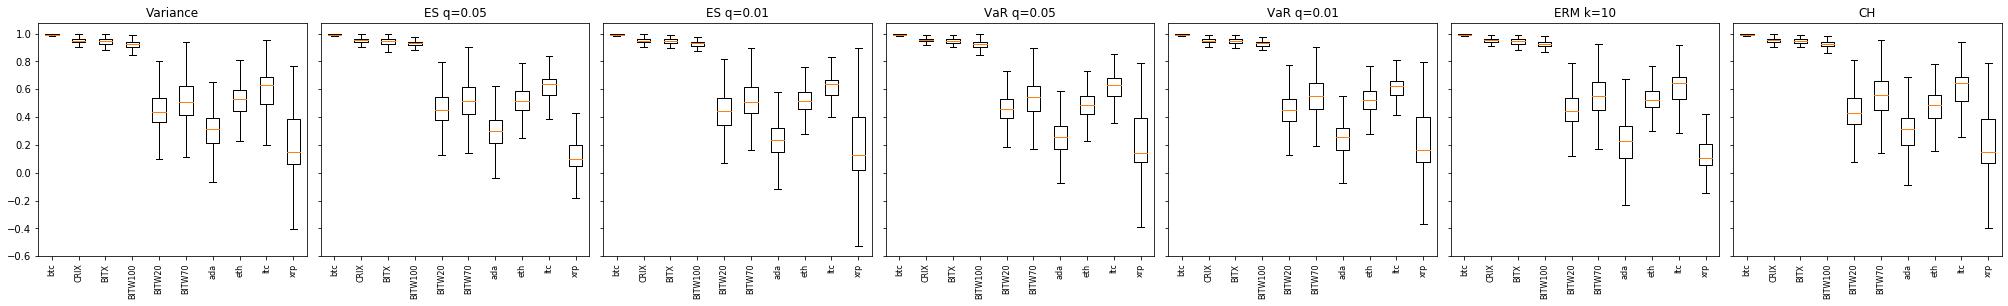

In [13]:
# Variance
risk_fn = np.var
plot_compare_assets_across_risk_measures(risk_fn, 1/200, 1000)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)

In [ ]:
# Value at Risk 5%
risk_fn = lambda x: VaR(0.05, x)
plot_compare_assets_across_risk_measures(risk_fn, 1/200, 1000)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)

In [ ]:
# Expected Shortfall 5%
risk_fn = lambda x: ES(0.05, x)
plot_compare_assets_across_risk_measures(risk_fn, 1/200, 1000)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)

In [ ]:
# ERM k=10
risk_fn = lambda x: ERM_estimate_trapezoidal(10, x)
plot_compare_assets_across_risk_measures(risk_fn, 1/200, 1000)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)

In [ ]:
# Maximum Drawdown
risk_fn = np.min
plot_compare_assets_across_risk_measures(risk_fn, 1/200, 1000)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 1000)

In [ ]:
risk_outer = []

N = 100

p = 1/200

# risk_fn = lambda x: ERM_estimate_trapezoidal(10, x)

risk_fn = lambda x: ES(0.05, x)

for rn in order[0:1]:

    path = '../../results/%s/MM/rh_cross_hedge.csv'\
                    %(rn)    
    _df = pd.read_csv(path)

    samples = SB(np.array(_df.loc[:,['rh', 'rs']]), p, N)

    risk = []

    for s in samples:
        risk_rh = risk_fn(s[:,0])
        risk_rs = risk_fn(s[:,1])
        risk.append(1-risk_rh/risk_rs)
        print(risk_rh, risk_rs, len(s))


    risk = np.array(risk)
    
    risk_outer.append(risk)
    print(rn)

In [ ]:
risk_fn = lambda x: ES(0.05, x)

plot_compare_assets_across_risk_measures(risk_fn, 1/200, 100)
plot_compare_risk_measures_across_assets(risk_fn, 1/200, 100)

In [ ]:
rn = 'BBT_future_CRIX'

path = '../../results/%s/MM/rh_cross_hedge.csv'\
%(rn)    
_df = pd.read_csv(path)

In [ ]:
h_arr = np.linspace(0.9,1.1, 1000)

rh_arr = []
for h in h_arr:
    rh = np.std(_df.rs - h*_df.rf)
    rh_arr.append(rh)
    
plt.plot(h_arr, rh_arr)
plt.ylabel('rh Std')
plt.xlabel('h')

In [14]:
h_arr = np.linspace(0.9,1.1, 1000)

rh_arr = []
for h in h_arr:
    rh = ES(0.05, _df.rs - h*_df.rf)
    rh_arr.append(rh)
    
plt.plot(h_arr, rh_arr)

mean_h = np.mean(_df.h)
mean_rho = ES(0.05, _df.rs-mean_h*_df.rf)

min_h = np.min(_df.h)
min_rho = ES(0.05, _df.rs-min_h*_df.rf)

max_h = np.max(_df.h)
max_rho = ES(0.05, _df.rs-max_h*_df.rf)

plt.scatter(mean_h, mean_rho)
plt.scatter(min_h, min_rho)
plt.scatter(max_h, max_rho)

plt.ylabel('rh ES 5%')
plt.xlabel('h')

NameError: name '_df' is not defined

In [16]:
risk_measures

['Variance',
 'ES q=0.05',
 'ES q=0.01',
 'VaR q=0.05',
 'VaR q=0.01',
 'ERM k=10',
 'CH']

In [28]:
ES5 = lambda x: ES(0.05, x)
ES1 = lambda x: ES(0.01, x)
VaR5 = lambda x: VaR(0.05, x)
VaR1 = lambda x: ES(0.01, x)
ERM = lambda x: ERM_estimate_trapezoidal(10, x)

risk_measure_arr = [Variance, ES5, ES1, VaR5, VaR1, ERM, Variance]
rm_dict = dict(zip(risk_measures, risk_measure_arr))


risk_measure_name = ['Variance', 'ES 95%', 'ES 99%', 'VaR 95%', 'VaR 99%', 'ERM', 'Variance']


rm2name =  dict(zip(risk_measures, risk_measure_name))

In [29]:
risk_measures

['Variance',
 'ES q=0.05',
 'ES q=0.01',
 'VaR q=0.05',
 'VaR q=0.01',
 'ERM k=10',
 'CH']

In [34]:
new_coin_names = coin_names = ['BTC', 'CRIX', 'BITX', 'BITW100', 'BITW20', 'BITW70', 'ADA', 'ETH', 'LTC', 'XRP']

In [49]:
start = []
for n in range(len(order)):
    rn = order[n]
    rm = 'ES q=0.05'
    path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
                    %(rn, rm)
    
    df = pd.read_csv(path)
    df.Date = pd.to_datetime(df.Date)
    
    start.append(np.min(df.Date))
    
start = np.max(start)
print(start)
start = '2019-10-21'

2019-10-21 20:00:00


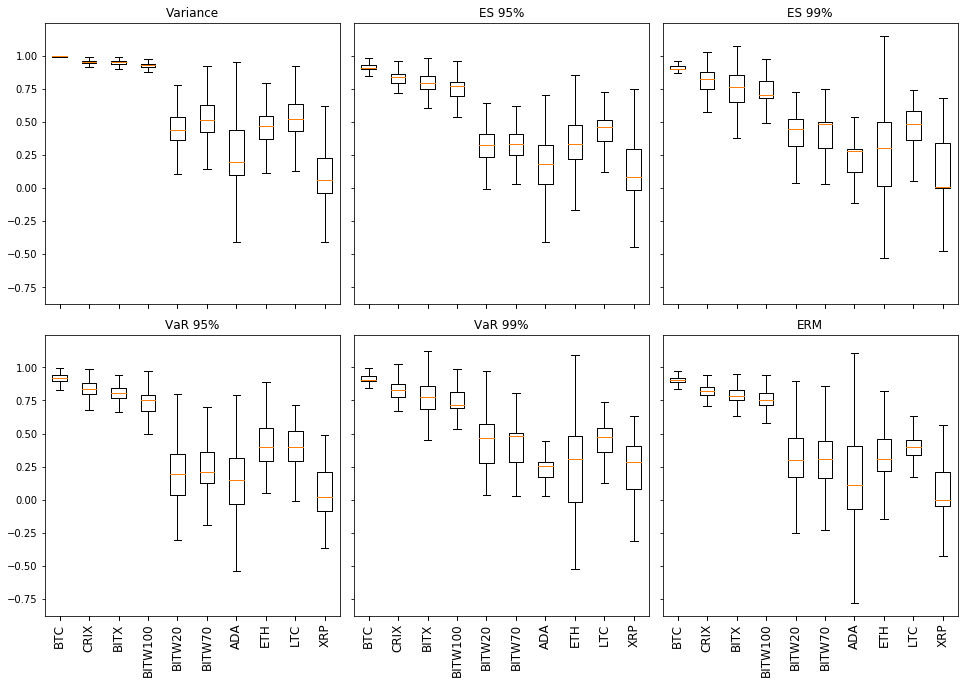

In [50]:
factor = 4.5
xsize = 3*factor
ysize = 2*factor

SB_p = 1/200
SB_N = 1000

fig, axs = plt.subplots(nrows=2,ncols=3, figsize=(xsize, ysize), sharex=True, sharey=True)

HE_outer2 = []
for p, rm in enumerate(risk_measures[:-1]):
    HE_outer = []
    
    risk_fn = rm_dict[rm]
    
    for q, rn in enumerate(order):
        if rm != 'CH':
            path = '../../results/%s/MM/rh_%s_copula_selection.csv'\
            %(rn, rm)
        else:
            path = '../../results/%s/MM/rh_cross_hedge.csv'\
            %(rn)    
        _df = pd.read_csv(path)

        _df = _df.loc[_df.Date >= start,:] 
        
        samples = SB(np.array(_df.loc[:,['rh', 'rs']]), SB_p, SB_N)

        HE = []
        for s in samples:
            risk_rh = risk_fn(s[:,0])
            risk_rs = risk_fn(s[:,1])
            HE.append(1-risk_rh/risk_rs)

        HE_outer.append(HE)
    HE_outer2.append(HE_outer)

    if p<=2:
        axs[0, p].boxplot(HE_outer, showfliers=False)
        axs[0, p].set_title(rm2name[rm])

    else:
        axs[1, p-3].boxplot(HE_outer, showfliers=False)
        axs[1, p-3].set_title(rm2name[rm], fontsize=12)

plt.tight_layout()

for p, a in enumerate(axs):
    xtickNames = plt.setp(axs[p], xticklabels=new_coin_names)
    plt.setp(xtickNames, rotation=90, fontsize=12)